In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image = Image.open('images/cat_2.jpg').convert('L')  # open image and convert to grayscale

print("Input image size:", image.size)
print("Input image mode:", image.mode)

Input image size: (1280, 853)
Input image mode: L


In [3]:
def calc_histogram(image, label):
    histogram = np.zeros(256)
    for pixel in image.getdata():
        histogram[pixel] += 1

    # Plot bar chart
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    ax.bar(range(256), histogram)
    ax.set_xlabel('Pixel value')
    ax.set_ylabel('Frequency')
    ax.set_title(label)
    plt.show()

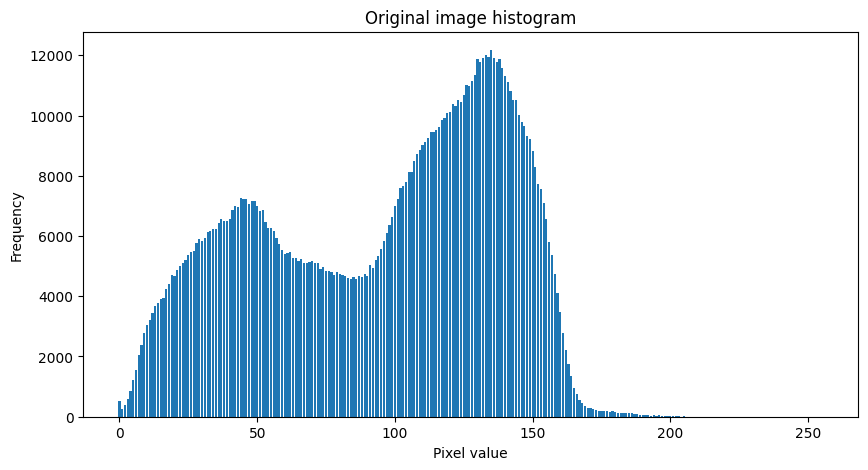

In [4]:
calc_histogram(image, 'Original image histogram')

In [36]:
def create_dark_image(image):
    dark_image = image.copy()
    np_dark_image = np.array(dark_image)
    np_dark_image = np_dark_image / 2.0
    np_dark_image = np_dark_image.astype(np.uint8)
    dark_image = Image.fromarray(np_dark_image)
    return dark_image

def create_bright_image(image):
    bright_image = image.copy()
    np_bright_image = np.array(bright_image)
    np_bright_image = np_bright_image / 2.0 + 127
    np_bright_image = np_bright_image.astype(np.uint8)
    bright_image = Image.fromarray(np_bright_image)
    return bright_image

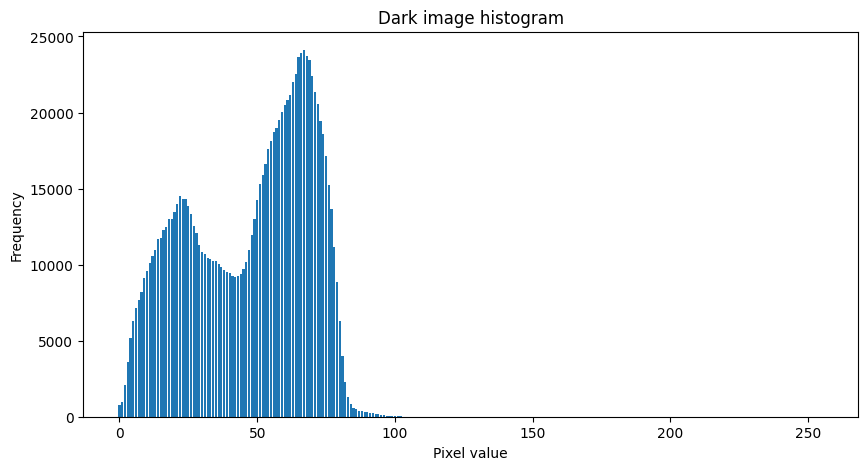

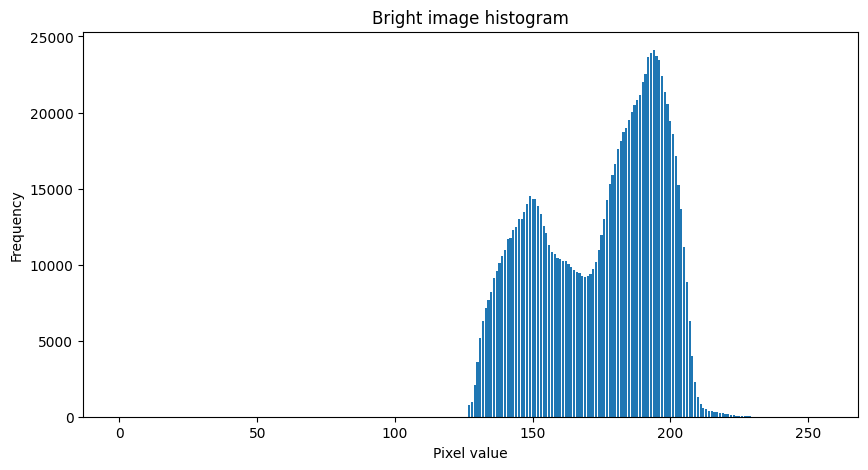

In [37]:
dark_image = create_dark_image(image)
dark_image.save('images/dark_image.png')

bright_image = create_bright_image(image)
bright_image.save('images/bright_image.png')

calc_histogram(dark_image, 'Dark image histogram')
calc_histogram(bright_image, 'Bright image histogram')

In [64]:
def gamma_correction(image, gamma):
    image = np.array(image, dtype=np.uint8)
    np_image = image / 255.0
    np_gamma_image = np.power(np_image, gamma)
    np_gamma_image = np_gamma_image * 255.0
    np_gamma_image = np_gamma_image.astype(np.uint8)
    np_gamma_image = Image.fromarray(np_gamma_image)
    return np_gamma_image

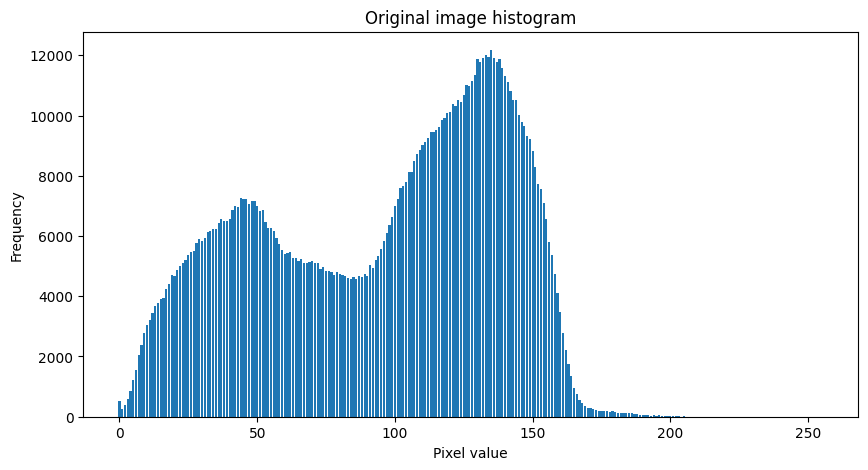

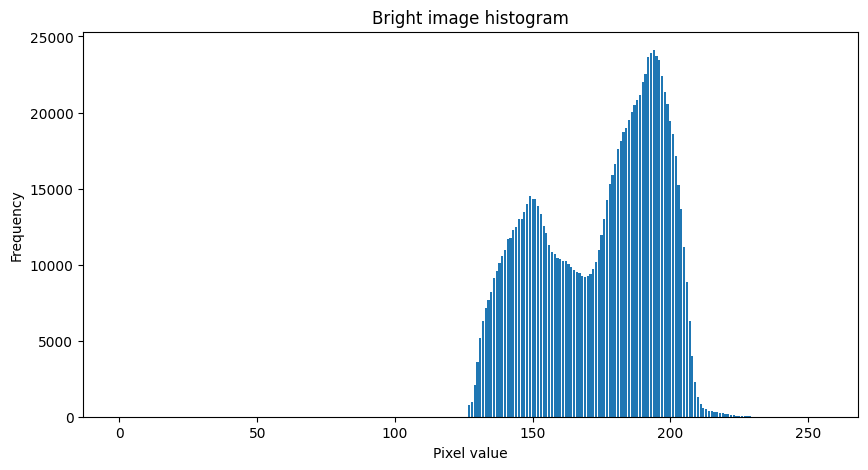

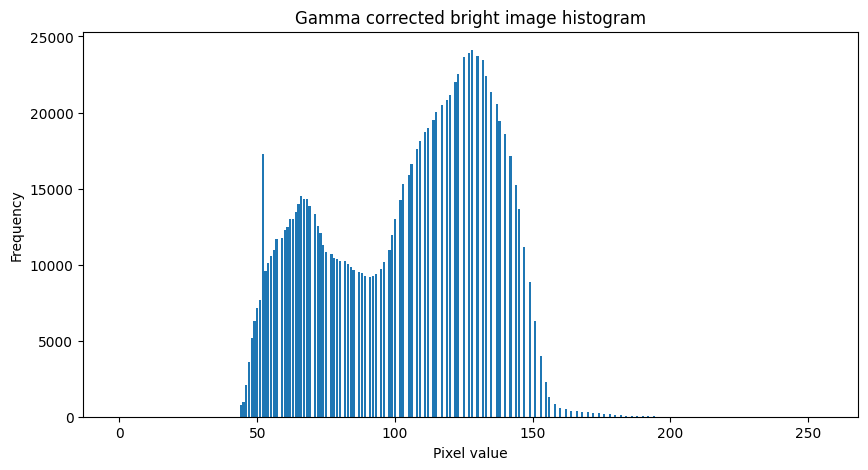

In [70]:
""" gamma_dark_image = gamma_correction(dark_image, 0.5)
gamma_dark_image.save('images/gamma_dark_image.png') """

gamma_bright_image = gamma_correction(bright_image, 2.5)
gamma_bright_image.save('images/gamma_bright_image.png')

calc_histogram(image, 'Original image histogram')
""" alc_histogram(dark_image, 'Dark image histogram')
calc_histogram(gamma_dark_image, 'Gamma corrected dark image histogram') """
calc_histogram(bright_image, 'Bright image histogram')
calc_histogram(gamma_bright_image, 'Gamma corrected bright image histogram')